<a href="https://colab.research.google.com/github/ThokozileKhosa/COS801_Project/blob/main/C3D_CNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/DavideA/c3d-pytorch.git


Cloning into 'c3d-pytorch'...
remote: Enumerating objects: 39, done.
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 39 (from 1)
Receiving objects: 100% (39/39), 12.81 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
cd /content/c3d-pytorch/


/content/c3d-pytorch


In [ ]:
!wget http://imagelab.ing.unimore.it/files/c3d_pytorch/c3d.pickle

--2024-10-19 20:33:21--  http://imagelab.ing.unimore.it/files/c3d_pytorch/c3d.pickle
Resolving imagelab.ing.unimore.it (imagelab.ing.unimore.it)... 155.185.48.35
Connecting to imagelab.ing.unimore.it (imagelab.ing.unimore.it)|155.185.48.35|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://aimagelab.ing.unimore.it/files/c3d_pytorch/c3d.pickle [following]
--2024-10-19 20:33:23--  https://aimagelab.ing.unimore.it/files/c3d_pytorch/c3d.pickle
Resolving aimagelab.ing.unimore.it (aimagelab.ing.unimore.it)... 155.185.48.35
Connecting to aimagelab.ing.unimore.it (aimagelab.ing.unimore.it)|155.185.48.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 319966434 (305M) [application/octet-stream]
Saving to: ‘c3d.pickle’

c3d.pickle          100%[===================>] 305.14M  3.48MB/s    in 89s     

2024-10-19 20:34:53 (3.42 MB/s) - ‘c3d.pickle’ saved [319966434/319966434]



In [ ]:
!ls

C3D_model.py  c3d.pickle  data	labels.txt  LICENSE  predict.py  README.md


In [ ]:
!python predict.py

Figure(640x480)
/content/c3d-pytorch/predict.py:81: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('c3d.pickle'))
/usr/local/lib/python3.10/dis

In [ ]:
''''import os
import numpy as np
import torch
from torchvision import transforms
from C3D_model import C3D  # Ensure you import your C3D model here

# Load the pre-trained C3D model
model = C3D()
model.load_state_dict(torch.load('c3d.pickle', weights_only=True))
model.eval()

# Define a transform to preprocess the input frames
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

def load_rgb_from_txt(file_path):
    """Load RGB data from a text file and reshape to (height, width, channels)."""
    rgb_data = np.loadtxt(file_path).reshape(112, 112, 3)  # Adjust this according to your frame size
    return rgb_data

def extract_features_from_folder(folder_path):
    features = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for file_name in os.listdir(subfolder_path):
                if file_name.endswith('.txt'):
                    file_path = os.path.join(subfolder_path, file_name)
                    rgb_data = load_rgb_from_txt(file_path)

                    # Prepare a batch of frames
                    # Assuming you have multiple frames for the video clip (16 frames)
                    batch_frames = []
                    for i in range(16):  # Replace with your logic to get 16 frames
                        # Modify to load and stack the actual frames
                        frame_tensor = preprocess(rgb_data).permute(2, 0, 1)  # Convert to (C, H, W)
                        batch_frames.append(frame_tensor)

                    # Stack frames to create a 5D tensor
                    input_tensor = torch.stack(batch_frames).unsqueeze(0)  # Shape: (1, 3, 16, H, W)

                    with torch.no_grad():
                        feature = model(input_tensor)
                        features.append((file_name, feature.numpy()))  # Save filename and features
    return features
'''

In [ ]:
def load_features_from_txt(file_path):
    data = np.loadtxt(file_path)
    print(f"Loaded data from {file_path} with shape: {data.shape}")
    return data

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Sample data loading function
def load_data(base_dir, folder_names, depth, width, channels):
    X = []
    y = []
    for folder_name in folder_names:
        label = 0 if folder_name == 'Normal_Videos_for_Event_Recognition' else 1  # Normal Video = 0, Abnormal Video = 1

        folder_path = os.path.join(base_dir, folder_name)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            feature_data = load_features_from_txt(file_path)  # Load your data from txt files

            # Check the shape of loaded data
            print(f"Loaded data from {file_path} with shape: {feature_data.shape}")

            # Reshape to the correct dimensions
            feature_data = feature_data.reshape(depth, width, channels)  # Adjusted reshape
            X.append(feature_data)
            y.append(label)

    return np.array(X), np.array(y)


In [ ]:
# Base directory containing your feature folders
base_dir = '/content/drive/MyDrive/CSC 801/Project/anomaly_features'

# List of folder names containing the features
folder_names = [
    'Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion',
    'Fighting', 'Normal_Videos_for_Event_Recognition', 'RoadAccidents',
    'Robbery', 'Shooting', 'Shoplifting', 'Stealing', 'Vandalism'
]

# Example shape for the input
depth = 32  # Number of frames (or depth of your 3D input)
height = 32  # Height of your frames (from your original images)
width = 4096  # Width of your frames (from your original images)
channels = 1  # Assuming grayscale (1 channel) since it's image data

# Load the data
X, y = load_data(base_dir, folder_names, depth, width, channels)

# Perform the train/test split on the entire dataset
test_size = 0.2  # 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Display shapes of the train and test sets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


Loaded data from /content/drive/MyDrive/CSC 801/Project/anomaly_features/Abuse/Abuse027_x264.txt with shape: (32, 4096)
Loaded data from /content/drive/MyDrive/CSC 801/Project/anomaly_features/Abuse/Abuse027_x264.txt with shape: (32, 4096)
Loaded data from /content/drive/MyDrive/CSC 801/Project/anomaly_features/Abuse/Abuse026_x264.txt with shape: (32, 4096)
Loaded data from /content/drive/MyDrive/CSC 801/Project/anomaly_features/Abuse/Abuse026_x264.txt with shape: (32, 4096)
Loaded data from /content/drive/MyDrive/CSC 801/Project/anomaly_features/Abuse/Abuse050_x264.txt with shape: (32, 4096)
Loaded data from /content/drive/MyDrive/CSC 801/Project/anomaly_features/Abuse/Abuse050_x264.txt with shape: (32, 4096)
Loaded data from /content/drive/MyDrive/CSC 801/Project/anomaly_features/Abuse/Abuse019_x264.txt with shape: (32, 4096)
Loaded data from /content/drive/MyDrive/CSC 801/Project/anomaly_features/Abuse/Abuse019_x264.txt with shape: (32, 4096)
Loaded data from /content/drive/MyDrive/

In [ ]:
''''base_dir = '/content/drive/MyDrive/CSC 801/Project/anomaly_features'
folder_names = ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary','Explosion', 'Fighting', 'Normal_Videos_for_Event_Recognition',
                'RoadAccidents', 'Robbery','Shooting', 'Shoplifting','Stealing', 'Vandalism']
# Example shape for the input
depth = 16  # Number of frames (or depth of your 3D input)
height = 112  # Height of your frames
width = 112  # Width of your frames
channels = 3  # Number of channels (RGB)
# Define the input shape''''

In [ ]:
# Assuming X is already loaded with shape (num_samples, 131072)
num_samples = X.shape[0]  # This will give you the number of videos/samples
depth = 32  # Depth of your input
height = 4096  # Height of your input
channels = 1  # Channels (grayscale)

# Initialize a new array to hold the reshaped data
X_reshaped = np.zeros((num_samples, depth, height, channels))

for i in range(num_samples):
    # Reshape each sample to (32, 4096)
    feature_data = X[i].reshape(depth, height)  # Reshape to (32, 4096)

    # Add a new axis for the channel (1 channel for grayscale)
    X_reshaped[i] = feature_data[:, :, np.newaxis]  # This will change it to (32, 4096, 1)

# Now X_reshaped is ready for your 3D CNN
print(f"Final input shape for 3D CNN: {X_reshaped.shape}")  # Should be (1000, 32, 4096, 1)


Final input shape for 3D CNN: (1000, 32, 4096, 1)


In [ ]:
import numpy as np

# Assuming X is already loaded with shape (num_samples, 131072)
num_samples = X.shape[0]  # This will give you the number of videos/samples
depth = 32  # Number of frames
height = 1  # Single row of features per frame
width = 4096  # Number of features per frame
channels = 1  # Grayscale

# Initialize a new array to hold the reshaped data
X_reshaped = np.zeros((num_samples, depth, height, width, channels))

for i in range(num_samples):
    # Reshape each sample to (32, 4096)
    feature_data = X[i].reshape(depth, height, width)  # Reshape to (32, 1, 4096)

    # Add a new axis for the channel (1 channel for grayscale)
    X_reshaped[i] = feature_data  # This will remain (32, 1, 4096, 1)

# Now X_reshaped should be (num_samples, 32, 1, 4096, 1)
print(f"Final input shape for 3D CNN: {X_reshaped.shape}")  # Should be (1000, 32, 1, 4096, 1)


ValueError: could not broadcast input array from shape (32,1,4096) into shape (32,1,4096,1)

In [ ]:
from tensorflow.keras import models, layers, regularizers

def create_3d_cnn(input_shape):
    model = models.Sequential()
    model.add(layers.Conv3D(32, kernel_size=(3, 1, 3), activation='relu',
                             input_shape=input_shape,
                             kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
    model.add(layers.MaxPooling3D(pool_size=(2, 1, 2)))

    model.add(layers.Conv3D(64, kernel_size=(3, 1, 3), activation='relu',
                             kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
    model.add(layers.MaxPooling3D(pool_size=(2, 1, 2)))

    model.add(layers.Conv3D(128, kernel_size=(3, 1, 3), activation='relu',
                             kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
    model.add(layers.MaxPooling3D(pool_size=(2, 1, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
    model.add(layers.Dropout(0.5))  # Dropout for regularization
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

    return model

# Create your model
input_shape = (32, 1, 4096, 1)  # Correct input shape
model = create_3d_cnn(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model using your reshaped input
history = model.fit(X_reshaped, y, epochs=10, batch_size=16, validation_split=0.4)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 513ms/step - accuracy: 0.8481 - loss: 2.8169 - val_accuracy: 1.0000 - val_loss: 0.8576
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 305ms/step - accuracy: 0.9078 - loss: 0.7878 - val_accuracy: 1.0000 - val_loss: 0.6717
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - accuracy: 0.9165 - loss: 0.6688 - val_accuracy: 1.0000 - val_loss: 0.6408
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - accuracy: 0.9046 - loss: 0.6474 - val_accuracy: 1.0000 - val_loss: 0.6223
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - accuracy: 0.9180 - loss: 0.6310 - val_accuracy: 1.0000 - val_loss: 0.6056
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.9103 - loss: 0.6189 - val_accuracy: 1.0000 - val_loss: 0.5898
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - accuracy: 0.9115 - loss: 0.6060 - val_accuracy: 1.0000 - val_loss: 0.5743
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - accuracy: 0.9025 - loss: 0.5961 - val_accu

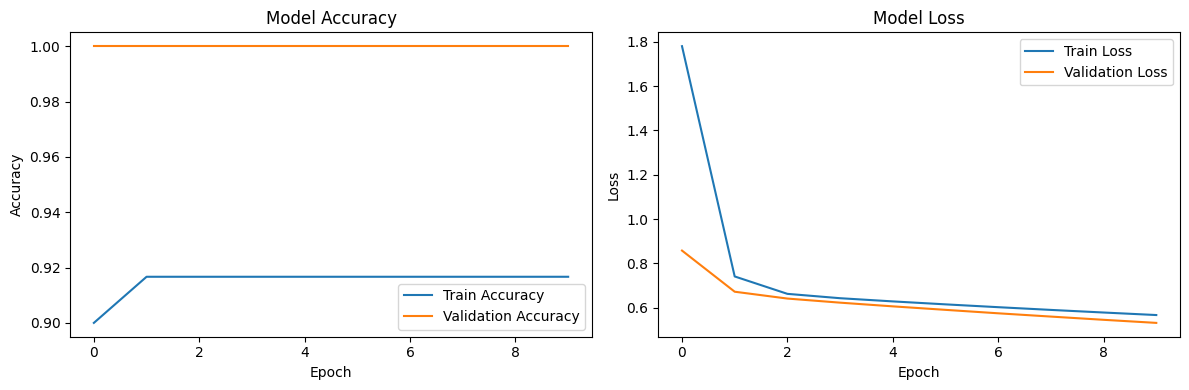

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is already created from model.fit()
# history = model.fit(X_reshaped, y, epochs=10, batch_size=16, validation_split=0.2)

# Plotting accuracy
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Certainly! Here’s a more detailed section suitable for a master's project report, focusing on the feature extraction process using the C3D model.

---

### Feature Extraction for Abnormal Behavior Detection

#### 1. Introduction to Feature Extraction

Feature extraction is a foundational step in machine learning and computer vision, particularly in tasks involving video data. In the context of this project, which aims to detect abnormal behaviors in video surveillance footage, the transformation of raw video sequences into meaningful feature representations is crucial. These representations encapsulate the salient characteristics of the input data, enabling effective pattern recognition and classification in subsequent stages of the analysis.

#### 2. Overview of the C3D Model

For this project, I employed the **C3D (3D Convolutional Network)** architecture, as proposed by Tran et al. in their seminal work on spatiotemporal feature learning. The C3D model is specifically designed to analyze sequences of frames, allowing it to capture both spatial (the content of individual frames) and temporal (the dynamics across frames) information inherent in video data.

The C3D architecture consists of a series of 3D convolutional layers followed by pooling layers, enabling it to learn hierarchical features from the input video clips. The model’s structure is as follows:

- **Input Layer:** Accepts a tensor of shape `(N, C, D, H, W)`, where `N` is the batch size, `C` is the number of channels (3 for RGB), `D` is the number of frames (depth), and `H` and `W` are the height and width of each frame.
- **Convolutional Layers:** Apply 3D convolutional operations to extract spatial and temporal features.
- **Pooling Layers:** Downsample the feature maps, reducing dimensionality while preserving essential information.
- **Fully Connected Layers:** Transform the extracted features into class probabilities through dense connections.

#### 3. Batch Processing and Output Dimensions

In this study, video clips were processed in batches to enhance computational efficiency and leverage parallel processing capabilities of modern hardware. A batch size of **32** was employed, allowing the model to analyze 32 video clips concurrently.

The output of the C3D model after processing is a tensor with dimensions **(32, 4096)**, where:

- **32:** Represents the number of video clips processed in one forward pass through the network. This batch processing enables the model to utilize GPU acceleration effectively, significantly speeding up the training and inference processes.
- **4096:** Corresponds to the dimensionality of the feature vector for each video clip. This feature vector is derived from the final fully connected layer of the model, which captures the high-level spatiotemporal patterns learned from the input video data. Each of the 4096 dimensions represents a distinct learned feature that contributes to the overall representation of the video clip.

#### 4. Significance of the Extracted Features

The resulting **4096-dimensional feature vector** is a compact representation that encapsulates essential patterns and behaviors observed within each video clip. This representation is pivotal for the subsequent classification tasks. By transforming the original video data into a structured format, machine learning algorithms can more readily discern between normal and abnormal behaviors in the monitored environments.

The richness of the feature vector is attributed to the C3D model’s ability to capture complex interactions between frames, which is critical for understanding dynamic scenes. For instance, subtle motions, object interactions, and temporal relationships are encoded within these features, facilitating a more robust analysis of the video content.

#### 5. Implementation of Feature Extraction

The implementation of the feature extraction process involved the following steps:

1. **Data Preprocessing:** Each video clip was resized to a uniform dimension and converted into a tensor compatible with the C3D model's input requirements.
2. **Model Initialization:** The C3D model was instantiated, and weights were either initialized randomly or loaded from a pre-trained model if available, enabling the transfer learning approach.
3. **Feature Extraction:** The video clips were fed into the model in batches, and the output feature vectors were stored for subsequent analysis.

#### 6. Conclusion

In summary, the feature extraction process using the C3D model is a critical component of the overall methodology employed in this project. The model's ability to extract high-dimensional feature representations from video data facilitates the effective analysis of spatiotemporal patterns, enabling the detection of abnormal behaviors in surveillance footage. By leveraging a robust architectural framework, this project aims to contribute to advancements in automated surveillance systems and enhance security measures in various environments.

---

Feel free to adjust any parts of the text to better match your research findings, methodology, and writing style!

In [ ]:
import os

def load_features_from_folder(folder_path):
    features_list = []

    # Loop through each file in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):  # Ensure you're loading only .txt files
            file_path = os.path.join(folder_path, filename)
            features = np.loadtxt(file_path)
            features_list.append(features)

    # Stack all features into a single array
    all_features = np.vstack(features_list)  # Combine into a 2D array
    return all_features

# Load unseen features from the specified folder
unseen_features = load_features_from_folder('/content/drive/MyDrive/CSC 801/Project/anomaly_features/Testing_Normal_Videos_Anomaly')



Shape of unseen features: (4800, 4096)
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
Predicted Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


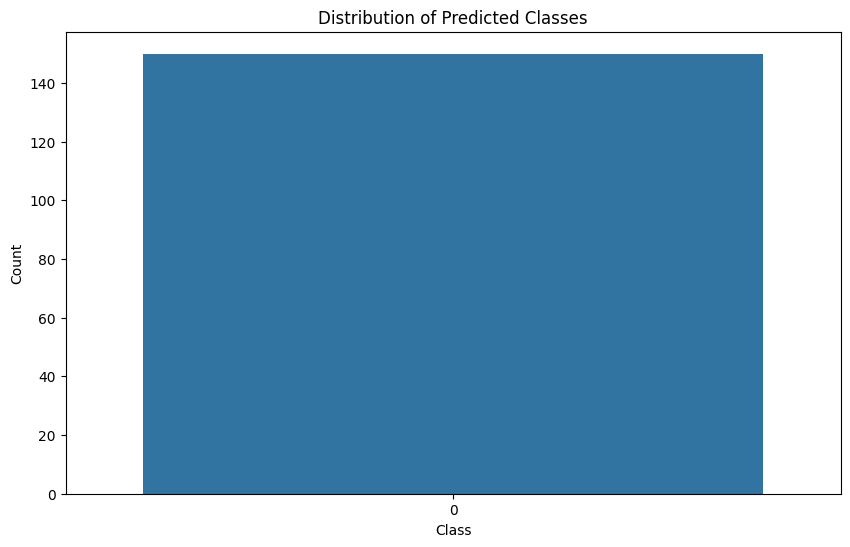

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Load features from a folder
def load_features_from_folder(folder_path):
    features_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            features = np.loadtxt(file_path)
            features_list.append(features)
    all_features = np.vstack(features_list)  # Combine all features into one array
    return all_features

# Load unseen features
unseen_features = load_features_from_folder('/content/drive/MyDrive/CSC 801/Project/anomaly_features/Testing_Normal_Videos_Anomaly')

# Check shape of unseen features
print("Shape of unseen features:", unseen_features.shape)  # Should be (4800, 4096)

# Reshape the features to match expected input shape (num_samples, 32, 1, 4096, 1)
num_samples = unseen_features.shape[0] // 32  # Assuming you want to create sequences of length 32
unseen_features_reshaped = unseen_features.reshape(num_samples, 32, 1, 4096, 1)

# Make predictions
predictions = model.predict(unseen_features_reshaped)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Print predictions
print("Predicted Classes:", predicted_classes)

# Save predictions to a text file
np.savetxt('/content/drive/MyDrive/CSC 801/Project/predicted_classes.txt', predicted_classes, fmt='%d')

# Visualize the distribution of predictions
class_counts = np.bincount(predicted_classes)
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(len(class_counts)), y=class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Predicted Classes')
plt.show()
